In [92]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

In [93]:
import os

# Run the setup script
%run ../config/setup_project.py

# Call the function to set up the project path
setup_project_path()

# Now you can import your modules
from src.utils import helper as h_
import code_ch_02 as f_




Project root added to sys.path: /Users/paulkelendji/Desktop/GitHub_paul/ML-Asset_Management/docs/references/De_Prado
Current sys.path: ['/Users/paulkelendji/miniconda3/envs/financial_math/lib/python38.zip', '/Users/paulkelendji/miniconda3/envs/financial_math/lib/python3.8', '/Users/paulkelendji/miniconda3/envs/financial_math/lib/python3.8/lib-dynload', '', '/Users/paulkelendji/miniconda3/envs/financial_math/lib/python3.8/site-packages', '/Users/paulkelendji/Desktop/GitHub_paul/ML-Asset_Management/docs/references/De_Prado']


In [94]:
import pickle

In [95]:
df = pd.read_parquet("../Data/IVE_tickbidask.parq")
df

,price,bid,ask,size,v,dv
dates,,,,,,
2009-09-28 09:30:00+00:00,50.79,50.70,50.79,100,100,5079.00
2009-09-28 09:30:00+00:00,50.71,50.70,50.79,638,638,32352.98
2009-09-28 09:31:32+00:00,50.75,50.75,50.76,100,100,5075.00
2009-09-28 09:31:33+00:00,50.75,50.72,50.75,100,100,5075.00
2009-09-28 09:31:50+00:00,50.75,50.73,50.76,300,300,15225.00
...,...,...,...,...,...,...
2018-10-05 15:59:59+00:00,116.20,116.18,116.19,2000,2000,232400.00
2018-10-05 15:59:59+00:00,116.20,116.18,116.19,3900,3900,453180.00
2018-10-05 16:00:00+00:00,116.22,116.20,116.21,42884,42884,4983978.48


In [96]:
# Later, you can read it back
df = pd.read_parquet("../Data/IVE_kibot.parq")
df

,price,bid,ask,size,v,dv
dates,,,,,,
2009-09-28 09:30:00,50.79,50.70,50.79,100,100,5079.00
2009-09-28 09:30:00,50.71,50.70,50.79,638,638,32352.98
2009-09-28 09:31:32,50.75,50.75,50.76,100,100,5075.00
2009-09-28 09:31:33,50.75,50.72,50.75,100,100,5075.00
2009-09-28 09:31:50,50.75,50.73,50.76,300,300,15225.00
...,...,...,...,...,...,...
2024-07-26 15:59:46,189.43,189.44,189.46,100,100,18943.00
2024-07-26 15:59:50,189.43,189.41,189.45,150,150,28414.50
2024-07-26 15:59:50,189.42,189.41,189.45,107,107,20267.94


In [97]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2786155 entries, 2009-09-28 09:30:00 to 2024-07-26 16:00:00
Data columns (total 6 columns):
 #   Column  Dtype  
---  ------  -----  
 0   price   float64
 1   bid     float64
 2   ask     float64
 3   size    int64  
 4   v       int64  
 5   dv      float64
dtypes: float64(4), int64(2)
memory usage: 148.8 MB
None


## Some Preprocessing

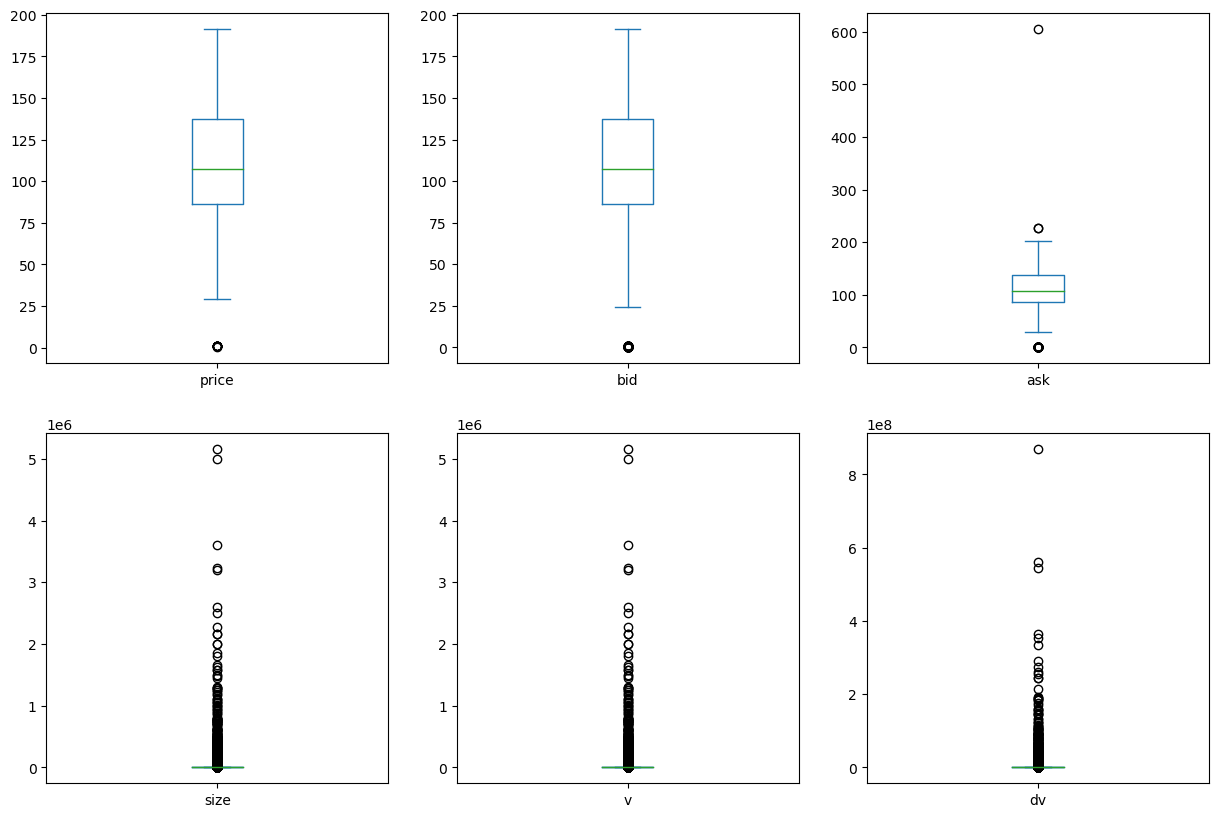

In [98]:
# Some data visualization on df
# Boxplots for each column
df[["price", "bid", "ask", "size", "v", "dv"]].plot(
    kind="box", subplots=True, layout=(2, 3), figsize=(15, 10)
)
plt.show()

In [99]:
# function to dectect, in a dataframe, rows where value is outside
# [Q1, Q3] + 1.5 * IQR


def detect_outliers(df: pd.DataFrame, col: str = "price", threshold: float = 1.5):
    """Returns boolean series where True indicates the presence of an outlier"""
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - threshold * IQR
    upper_bound = Q3 + threshold * IQR
    return (df[col] < lower_bound) | (df[col] > upper_bound)


outliers = detect_outliers(df)

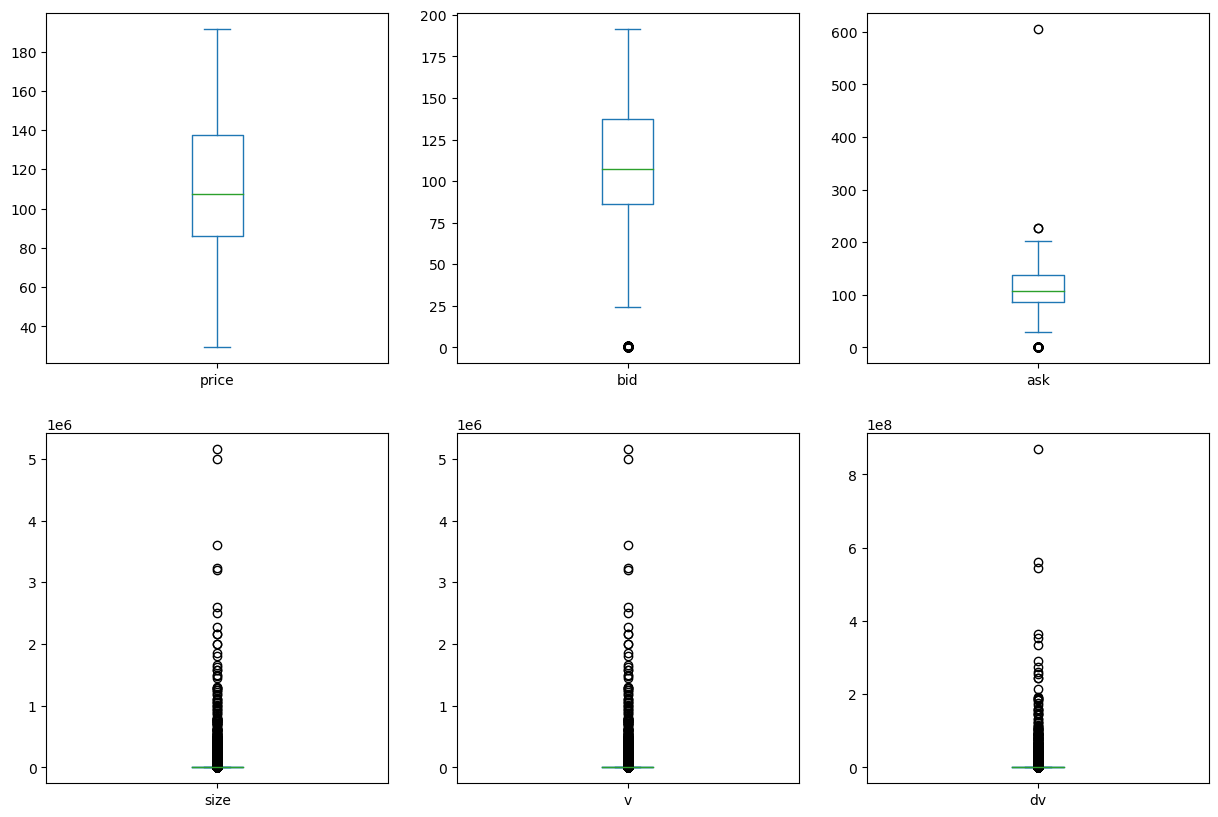

In [100]:
df = df.loc[~outliers]
df[["price", "bid", "ask", "size", "v", "dv"]].plot(
    kind="box", subplots=True, layout=(2, 3), figsize=(15, 10)
)
plt.show()

In [101]:
# scale columns

In [102]:
df

,price,bid,ask,size,v,dv
dates,,,,,,
2009-09-28 09:30:00,50.79,50.70,50.79,100,100,5079.00
2009-09-28 09:30:00,50.71,50.70,50.79,638,638,32352.98
2009-09-28 09:31:32,50.75,50.75,50.76,100,100,5075.00
2009-09-28 09:31:33,50.75,50.72,50.75,100,100,5075.00
2009-09-28 09:31:50,50.75,50.73,50.76,300,300,15225.00
...,...,...,...,...,...,...
2024-07-26 15:59:46,189.43,189.44,189.46,100,100,18943.00
2024-07-26 15:59:50,189.43,189.41,189.45,150,150,28414.50
2024-07-26 15:59:50,189.42,189.41,189.45,107,107,20267.94


In [103]:
data = df.reset_index()
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2786144 entries, 0 to 2786143
Data columns (total 7 columns):
 #   Column  Dtype         
---  ------  -----         
 0   dates   datetime64[ns]
 1   price   float64       
 2   bid     float64       
 3   ask     float64       
 4   size    int64         
 5   v       int64         
 6   dv      float64       
dtypes: datetime64[ns](1), float64(4), int64(2)
memory usage: 148.8 MB
None


In [104]:
data.head()

,dates,price,bid,ask,size,v,dv
0,2009-09-28 09:30:00,50.79,50.70,50.79,100,100,5079.00
1,2009-09-28 09:30:00,50.71,50.70,50.79,638,638,32352.98
2,2009-09-28 09:31:32,50.75,50.75,50.76,100,100,5075.00
3,2009-09-28 09:31:33,50.75,50.72,50.75,100,100,5075.00
4,2009-09-28 09:31:50,50.75,50.73,50.76,300,300,15225.00


In [105]:
# data['dates'] = data['dates'].map(lambda t : datetime.strptime(t[:-3], '%Y-%m-%dD%H:%M:%S.%f'))
# data

# Exercises

In [106]:
"""
2.1 On a series of E-mini S&P 500 futures tick data:
(a) Form tick, volume, and dollar bars. Use the ETF trick to deal with the roll.
(b) Count the number of bars produced by tick, volume, and dollar bars on a
weekly basis. Plot a time series of that bar count. What bar type produces
the most stable weekly count? Why?
(c) Compute the serial correlation of returns for the three bar types. What bar method has the lowest serial correlation?
(d)
(e)
Partitionthebarseriesintomonthlysubsets.Computethevarianceofreturns for every subset of every bar type. Compute the variance of those variances. What method exhibits the smallest variance of variances?
Apply the Jarque-Bera normality test on returns from the three bar types. What method achieves the lowest test statistic?
"""

'\n2.1 On a series of E-mini S&P 500 futures tick data:\n(a) Form tick, volume, and dollar bars. Use the ETF trick to deal with the roll.\n(b) Count the number of bars produced by tick, volume, and dollar bars on a\nweekly basis. Plot a time series of that bar count. What bar type produces\nthe most stable weekly count? Why?\n(c) Compute the serial correlation of returns for the three bar types. What bar method has the lowest serial correlation?\n(d)\n(e)\nPartitionthebarseriesintomonthlysubsets.Computethevarianceofreturns for every subset of every bar type. Compute the variance of those variances. What method exhibits the smallest variance of variances?\nApply the Jarque-Bera normality test on returns from the three bar types. What method achieves the lowest test statistic?\n'

## 2.1 On a series of E-mini S&P 500 futures tick data:

##### (a) Form tick, volume, and dollar bars. Use the ETF trick to deal with the roll.

In [107]:
"""2.1 On a series of E-mini S&P 500 futures tick data:
(a) Form tick, volume, and dollar bars. Use the ETF trick to deal with the roll.
"""

# ======== INPUTS =========
# 1 Month
timefreq = "1D"

# =========================


class Bar:
    def __init__(self, grouped_df: pd.DataFrame, Bar_Type: str = None):
        """
        df must be a GroupBy object
        """
        self.Bar_Type = Bar_Type
        self.num_of_bars = len(grouped_df)

        df_vwap = grouped_df.apply(
            lambda x: f_.compute_vwap(x, price_column="price", volume_column="v")
        )

        df_vwap.reset_index(drop=True, inplace=True)
        self.df = df_vwap


# Define the Bars class
class Bars:
    """Simply to hold some bars"""

    def __init__(self):
        self.bars = {}

    def add_bar(self, key, bar):
        self.bars[key] = bar

    def __iter__(self):
        return iter(self.bars.values())

    def items(self):
        return self.bars.items()

In [108]:
# Time Bars
first_date = data["dates"].iloc[0]  # first_date
last_date = data["dates"].iloc[-1]  # last_date
date_bins = pd.date_range(start=first_date, end=last_date, freq=timefreq)
date_bins = date_bins.union([last_date]).union([first_date])  # not so rigourous
grouped_time = data.copy()
grouped_time["id"] = pd.cut(
    grouped_time["dates"], date_bins, labels=False, include_lowest=True
)
GB_grouped_time = grouped_time.groupby("id")
Bars_time = Bar(GB_grouped_time, Bar_Type="Time")

# Tick Bars
total_ticks = data.shape[0]
nums_ticks_per_bar = total_ticks // Bars_time.num_of_bars
grouped_tick = data.copy()
grouped_tick["id"] = grouped_tick.index // nums_ticks_per_bar
GB_grouped_tick = grouped_tick.groupby("id")
Bars_tick = Bar(GB_grouped_tick, Bar_Type="Tick")

# Volume Bars
total_volume = data["v"].sum()
volume_per_bar = total_volume // Bars_time.num_of_bars
grouped_volume = data.copy()
grouped_volume["id"] = grouped_volume["v"].cumsum() // volume_per_bar
GB_grouped_volume = grouped_volume.groupby("id")
Bars_volume = Bar(GB_grouped_volume, Bar_Type="Volume")

# Dollar Bars
total_dollar = data["dv"].sum()
dollar_per_bar = total_dollar // Bars_time.num_of_bars
grouped_dollar = data.copy()
grouped_dollar["id"] = grouped_dollar["dv"].cumsum() // dollar_per_bar
GB_grouped_dollar = grouped_dollar.groupby("id")
Bars_dollar = Bar(GB_grouped_dollar, Bar_Type="Dollar")

In [109]:
bars = {
    "Time": Bars_time,
    "Tick": Bars_tick,
    "Volume": Bars_volume,
    "Dollar": Bars_dollar,
}

In [110]:
bars["Dollar"].df 

,dates,price,bid,ask,size,v,dv,id,vwap
0,2009-09-28 09:30:00,50.79,50.70,50.79,100,100,5079.00,0.0,51.430024
1,2009-09-28 09:30:00,50.71,50.70,50.79,638,638,32352.98,0.0,51.430024
2,2009-09-28 09:31:32,50.75,50.75,50.76,100,100,5075.00,0.0,51.430024
3,2009-09-28 09:31:33,50.75,50.72,50.75,100,100,5075.00,0.0,51.430024
4,2009-09-28 09:31:50,50.75,50.73,50.76,300,300,15225.00,0.0,51.430024
...,...,...,...,...,...,...,...,...,...
2786139,2024-07-26 15:59:46,189.43,189.44,189.46,100,100,18943.00,4522.0,189.348801
2786140,2024-07-26 15:59:50,189.43,189.41,189.45,150,150,28414.50,4522.0,189.348801
2786141,2024-07-26 15:59:50,189.42,189.41,189.45,107,107,20267.94,4522.0,189.348801
2786142,2024-07-26 15:59:52,189.46,189.42,189.46,595,595,112728.70,4522.0,189.348801


In [111]:
idx = bars["Dollar"].df['id']==1
bars["Dollar"].df.loc[idx]

,dates,price,bid,ask,size,v,dv,id,vwap
1778,2009-09-29 13:26:31,51.7275,51.71,51.73,1000,1000,51727.50,1.0,50.908633
1779,2009-09-29 13:30:07,51.7400,51.73,51.74,300,300,15522.00,1.0,50.908633
1780,2009-09-29 13:30:07,51.7400,51.73,51.74,640,640,33113.60,1.0,50.908633
1781,2009-09-29 13:30:14,51.7300,51.73,51.74,305,305,15777.65,1.0,50.908633
1782,2009-09-29 13:31:49,51.7200,51.71,51.72,315,315,16291.80,1.0,50.908633
...,...,...,...,...,...,...,...,...,...
3899,2009-10-01 13:41:28,50.1900,50.18,50.19,200,200,10038.00,1.0,50.908633
3900,2009-10-01 13:43:11,50.2300,50.23,50.25,100,100,5023.00,1.0,50.908633
3901,2009-10-01 13:43:40,50.2280,50.21,50.23,300,300,15068.40,1.0,50.908633
3902,2009-10-01 13:43:54,50.2500,50.25,50.27,200,200,10050.00,1.0,50.908633


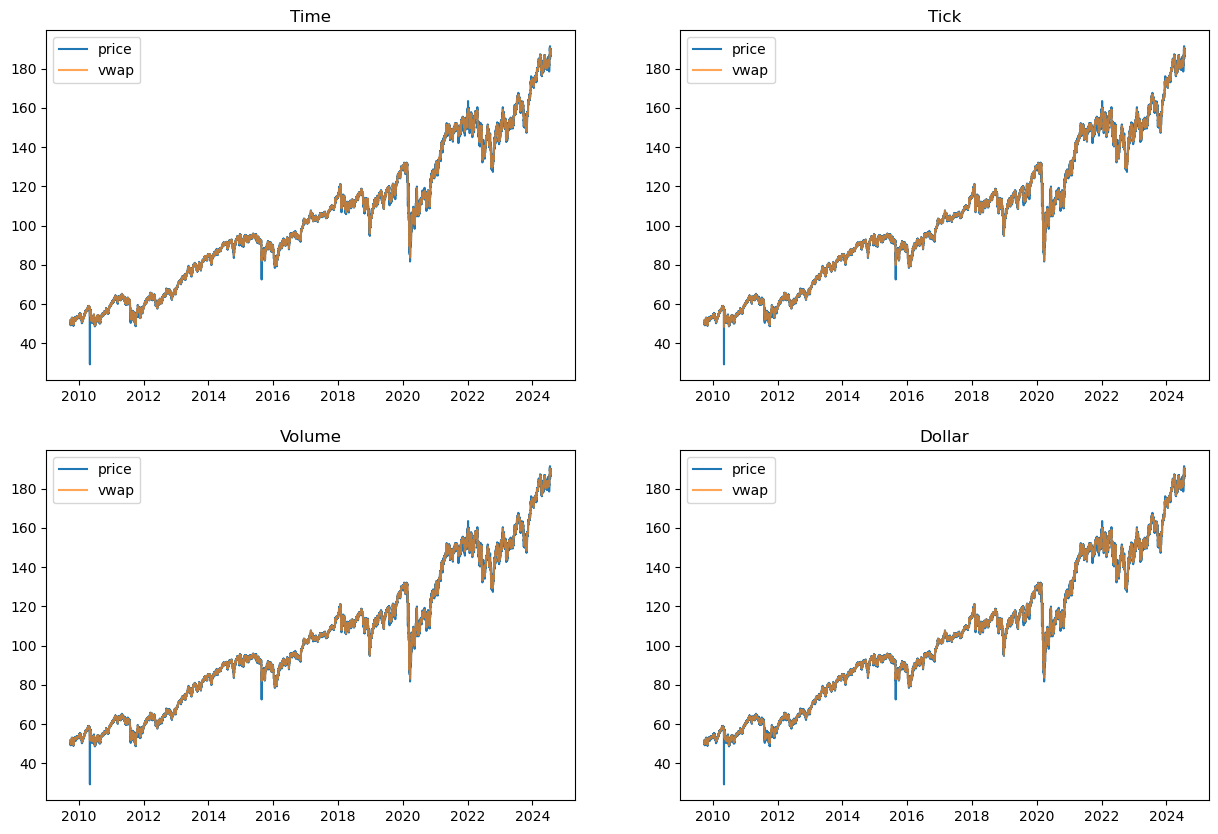

In [112]:
# 4 plots where on each plot there is 2 time series, vwap and price
# x axis is time

fig, axs = plt.subplots(2, 2, figsize=(15, 10))
x_axis = data["dates"]

for i, (key, bar) in enumerate(bars.items()):
    axs[i // 2, i % 2].plot(x_axis, bar.df["price"], label="price")
    axs[i // 2, i % 2].plot(x_axis, bar.df["vwap"], label="vwap", alpha=0.7)
    axs[i // 2, i % 2].set_title(key)
    axs[i // 2, i % 2].legend()

In [113]:
# # 4 plots where on each plot there is 2 time series, vwap and price
# # x axis is time

# fig, axs = plt.subplots(2, 2, figsize=(15, 10))
# x_axis = data['dates']

# # Time Bars
# axs[0, 0].plot(x_axis, Bars_time.df['price'], label='price')
# axs[0, 0].plot(x_axis, Bars_time.df['vwap'], label='vwap', alpha=0.7)
# axs[0, 0].set_title('Time Bars')
# axs[0, 0].legend()

# # Tick Bars
# axs[0, 1].plot(x_axis, Bars_tick.df['price'], label='price')
# axs[0, 1].plot(x_axis, Bars_tick.df['vwap'], label='vwap', alpha=0.7)
# axs[0, 1].set_title('Tick Bars')
# axs[0, 1].legend()

# # Volume Bars
# axs[1, 0].plot(x_axis, Bars_volume.df['price'], label='price')
# axs[1, 0].plot(x_axis, Bars_volume.df['vwap'], label='vwap', alpha=0.7)
# axs[1, 0].set_title('Volume Bars')
# axs[1, 0].legend()

# # Dollar Bars
# axs[1, 1].plot(x_axis, Bars_dollar.df['price'], label='price')
# axs[1, 1].plot(x_axis, Bars_dollar.df['vwap'], label='vwap', alpha=0.7)
# axs[1, 1].set_title('Dollar Bars')
# axs[1, 1].legend()

##### (b) Count the number of bars produced by tick, volume, and dollar bars on a weekly basis. Plot a time series of that bar count. What bar type produces the most stable weekly count? Why?

In [114]:
"""(b) Count the number of bars produced by tick, volume, and dollar bars on a 
weekly basis. Plot a time series of that bar count. What bar type produces the 
most stable weekly count? Why?
"""


def count_bars_Weekly(grouped_df: pd.DataFrame):
    df = grouped_df.copy()
    # set the index to be the dates
    df.set_index("dates", inplace=True)
    df = df["id"]
    # resample to weekly, count discint 'id's
    df = df.resample("W").nunique()
    return df


for bar in bars.values():
    self = bar
    self.weekly_count = count_bars_Weekly(self.df)
    print(f"For Bar Type: {self.Bar_Type}")
    print(f"Weekly count average : {self.weekly_count.mean():.2f}")
    print(f"Weekly count std : {self.weekly_count.std():.2f}")
    print()

For Bar Type: Time
Weekly count average : 5.84
Weekly count std : 0.37

For Bar Type: Tick
Weekly count average : 6.85
Weekly count std : 3.83

For Bar Type: Volume
Weekly count average : 6.51
Weekly count std : 3.47

For Bar Type: Dollar
Weekly count average : 6.45
Weekly count std : 4.16



In [115]:
## Make OLHC bars


def make_OLHC_bars(df: pd.DataFrame, key: str = "id"):
    """
    Inputs a dataframe with a column indicating the bar id, and returns a
    dataframe with columns:
    - open (first price in the bar)
    - low (min price in the bar)
    - high (max price in the bar)
    - close (last price in the bar)
    - vwap (volume weighted average price in the bar)
    - volume (total volume in the bar)
    - time (timestamp of the last price in the bar)
    """
    df = df.copy()

    def _agg(df):
        """Helper function to apply to each group"""
        return pd.Series(
            {
                "time_open": df["dates"].iloc[0],
                "open": df["price"].iloc[0],
                "low": df["price"].min(),
                "high": df["price"].max(),
                "close": df["price"].iloc[-1],
                "time_close": df["dates"].iloc[-1],
                "vwap": (df["price"] * df["v"]).sum() / df["v"].sum(),
                "volume": df["v"].sum(),
            }
        )

    return df.groupby(key).apply(_agg).reset_index(drop=True)


for bar in bars.values():
    self = bar
    self.df_OLHC = make_OLHC_bars(self.df)
    print(f"For Bar Type: {self.Bar_Type}")
    print(self.df_OLHC.head())
    print()

For Bar Type: Time
            time_open   open    low     high  close          time_close  \
0 2009-09-28 09:30:00  50.79  50.71  51.8400  51.72 2009-09-29 09:30:00   
1 2009-09-29 09:30:02  51.67  51.37  51.9600  51.58 2009-09-30 09:30:00   
2 2009-09-30 09:30:01  51.60  50.78  51.6644  51.09 2009-10-01 09:29:55   
3 2009-10-01 09:30:01  51.09  49.24  51.0900  49.24 2009-10-02 09:30:00   
4 2009-10-02 09:30:01  49.30  49.19  49.8100  49.51 2009-10-02 16:00:00   

        vwap  volume  
0  51.369156  542601  
1  51.632510  257815  
2  51.136872  280239  
3  50.336446  630674  
4  49.606628  506838  

For Bar Type: Tick
            time_open    open     low     high    close          time_close  \
0 2009-09-28 09:30:00  50.790  50.710  51.4400  51.4200 2009-09-28 12:01:38   
1 2009-09-28 12:01:41  51.428  51.379  51.9200  51.8400 2009-09-29 09:51:44   
2 2009-09-29 09:51:45  51.840  51.370  51.9600  51.6674 2009-09-29 14:24:05   
3 2009-09-29 14:25:54  51.652  50.780  51.6900  50.9100 

In [116]:
bars["Dollar"].df_OLHC

,time_open,open,low,high,close,time_close,vwap,volume
0,2009-09-28 09:30:00,50.7900,50.710,51.9600,51.730,2009-09-29 13:23:42,51.430024,701459
1,2009-09-29 13:26:31,51.7275,50.070,51.7600,50.270,2009-10-01 13:44:06,50.908633,709392
2,2009-10-01 13:45:10,50.2376,49.190,50.3166,49.761,2009-10-02 14:37:25,49.836850,724111
3,2009-10-02 14:38:03,49.7635,49.440,51.4700,51.090,2009-10-07 11:39:00,50.606475,713127
4,2009-10-07 11:40:15,51.0880,50.980,52.2252,51.990,2009-10-12 14:24:38,51.675670,698754
...,...,...,...,...,...,...,...,...
4227,2024-07-24 15:51:05,186.6706,186.460,188.5800,188.400,2024-07-25 11:50:36,187.387274,186271
4228,2024-07-25 11:50:40,188.4000,187.685,189.1286,187.685,2024-07-25 14:46:14,188.380972,194394
4229,2024-07-25 14:46:35,187.6150,186.980,189.2300,189.020,2024-07-26 10:11:15,187.749127,195797
4230,2024-07-26 10:12:45,189.0497,188.665,190.0100,189.460,2024-07-26 15:59:52,189.348801,183912


### (c) c) Compute the serial correlation of returns for the three bar types. What bar method has the lowest serial correlation?

In [117]:
"""c) Compute the serial correlation of returns for the three bar types. What bar
method has the lowest serial correlation?
"""

# price_tickBars, price_volumeBars, price_dollarBars


def bars_autocorr(df: pd.DataFrame, col: str = "close"):
    """Compute serial correlation of the returns."""
    bar_price = df["close"]
    rets = np.log(bar_price).diff().dropna()
    return rets.autocorr()


for bar in bars.values():
    self = bar
    self.autocorr = bars_autocorr(self.df_OLHC)
    print(f"For Bar Type: {self.Bar_Type}")
    print(f"Serial correlation of returns: {self.autocorr:.4f}")
    print()

For Bar Type: Time
Serial correlation of returns: -0.0392

For Bar Type: Tick
Serial correlation of returns: -0.0329

For Bar Type: Volume
Serial correlation of returns: -0.0624

For Bar Type: Dollar
Serial correlation of returns: -0.0284



#### d) Partition the bar series into monthly subsets. Compute the variance of returns for every subset of every bar type. Compute the variance of those variances. What method exhibits the smallest variance of variances?

In [118]:
"""d) Partition the bar series into monthly subsets. Compute the variance of returns
for every subset of every bar type. Compute the variance of those variances.
What method exhibits the smallest variance of variances?
"""


def bars_monthly_var(df: pd.DataFrame):
    """Compute the variance of the returns for each month"""
    df = df.copy()
    df["month"] = df["time_close"].dt.month
    df["ret"] = np.log(df["close"]).diff()
    return df.groupby("month")["ret"].var().var()


for bar in bars.values():
    self = bar
    self.monthly_var = bars_monthly_var(self.df_OLHC)
    print(f"For Bar Type: {self.Bar_Type}")
    print(f"Monthly variance of returns: {self.monthly_var}")
    print()

For Bar Type: Time
Monthly variance of returns: 8.474026854730728e-10

For Bar Type: Tick
Monthly variance of returns: 8.767962899010473e-10

For Bar Type: Volume
Monthly variance of returns: 1.5950487126009756e-09

For Bar Type: Dollar
Monthly variance of returns: 1.1299881339422933e-09



### (e) Apply the Jarque-Bera normality test on returns from the three bar types. What method achieves the lowest test statistic?

In [119]:
"""(e) Apply the Jarque-Bera normality test on returns from the three bar types.
What method achieves the lowest test statistic?
"""

from scipy.stats import jarque_bera


def bars_jarque_bera(df: pd.DataFrame):
    """
    Compute the Jarque-Bera test for normality of the returns.

    df must contain olhc bars
    """
    df = df.copy()
    rets = np.log(df["close"]).diff().dropna()
    return jarque_bera(rets)[0]


for bar in bars.values():
    self = bar
    self.jarque_bera = bars_jarque_bera(self.df_OLHC)
    print(f"For Bar Type: {self.Bar_Type}")
    print(f"Jarque-Bera test statistic: {self.jarque_bera:.4f}")
    print()

For Bar Type: Time
Jarque-Bera test statistic: 31968.8130

For Bar Type: Tick
Jarque-Bera test statistic: 14423.0223

For Bar Type: Volume
Jarque-Bera test statistic: 23288.6172

For Bar Type: Dollar
Jarque-Bera test statistic: 14350.6650



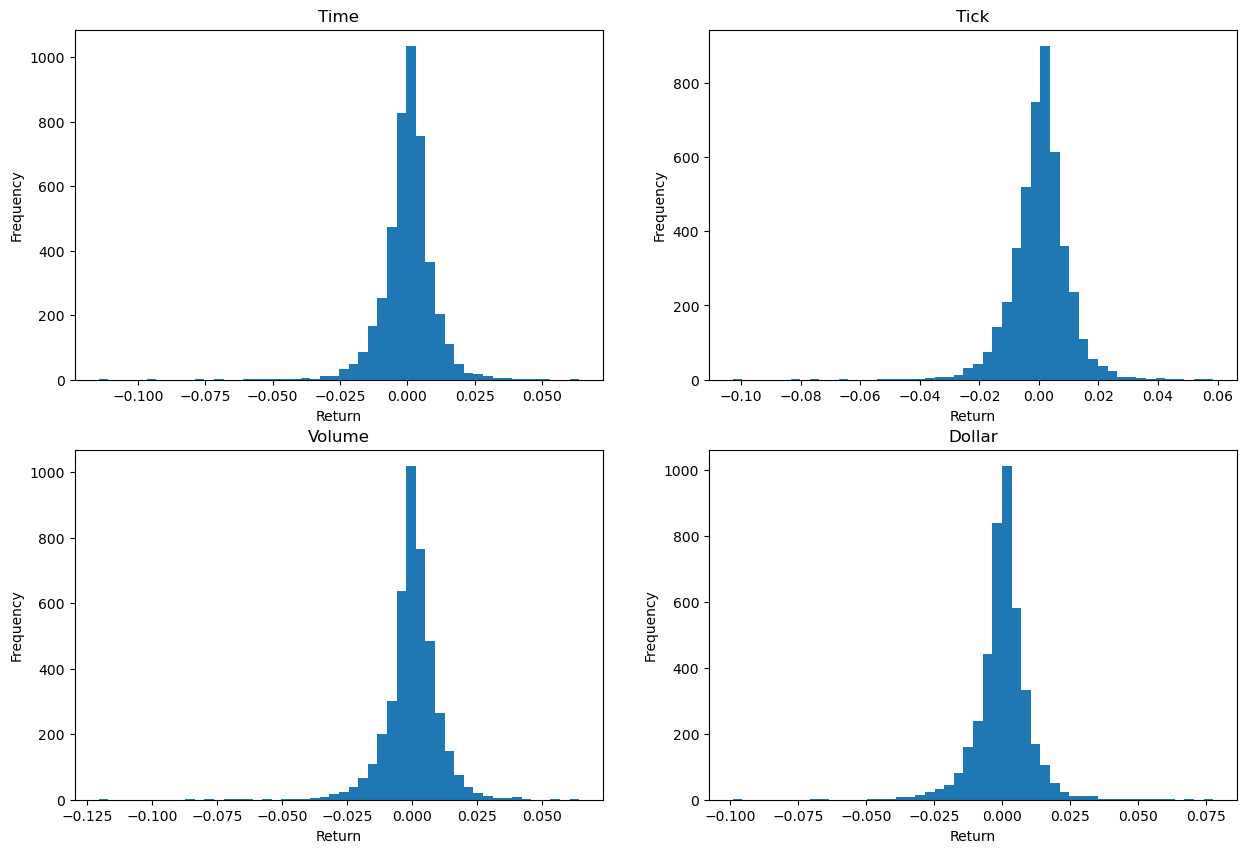

In [120]:
# histogram returns of the 4 bars

for bar in bars.values():
    df = bar.df_OLHC
    bar.returns = np.log(df["close"]).diff().dropna()

# 4 plots where on each plot there is 2 time series, vwap and price
# x axis is time

fig, axs = plt.subplots(2, 2, figsize=(15, 10))

for i, (key, bar) in enumerate(bars.items()):
    axs[i // 2, i % 2].hist(bar.returns, bins=50)
    axs[i // 2, i % 2].set_title(key)
    axs[i // 2, i % 2].set_xlabel("Return")
    axs[i // 2, i % 2].set_ylabel("Frequency")

## 2.2 On a series of E-mini S&P 500 futures tick data, compute dollar bars and dollar imbalance bars. What bar type exhibits greater serial correlation? Why?

In [121]:
"""On a series of E-mini S&P 500 futures tick data, compute dollar bars
and dollar imbalance bars. What bar type exhibits greater serial correlation?
Why?
"""

'On a series of E-mini S&P 500 futures tick data, compute dollar bars\nand dollar imbalance bars. What bar type exhibits greater serial correlation?\nWhy?\n'

In [122]:
data

,dates,price,bid,ask,size,v,dv
0,2009-09-28 09:30:00,50.79,50.70,50.79,100,100,5079.00
1,2009-09-28 09:30:00,50.71,50.70,50.79,638,638,32352.98
2,2009-09-28 09:31:32,50.75,50.75,50.76,100,100,5075.00
3,2009-09-28 09:31:33,50.75,50.72,50.75,100,100,5075.00
4,2009-09-28 09:31:50,50.75,50.73,50.76,300,300,15225.00
...,...,...,...,...,...,...,...
2786139,2024-07-26 15:59:46,189.43,189.44,189.46,100,100,18943.00
2786140,2024-07-26 15:59:50,189.43,189.41,189.45,150,150,28414.50
2786141,2024-07-26 15:59:50,189.42,189.41,189.45,107,107,20267.94
2786142,2024-07-26 15:59:52,189.46,189.42,189.46,595,595,112728.70


In [123]:
def bt_dataframe(df: pd.DataFrame, price_column: str = "price"):
    """Adds the b_t column to the dataframe"""
    df_copy = df.copy()
    # Shift the 'price' column to get the previous row values
    prev_price = df_copy["price"].shift(1).fillna(df_copy["price"].iloc[0])
    # Use numpy's vectorized operations to compute 'b_t'
    df_copy["bt"] = np.where(
        df_copy["price"] == prev_price, 0, np.sign(df_copy["price"] - prev_price)
    )
    return df_copy


data_imb = bt_dataframe(data)
data_imb.head()

,dates,price,bid,ask,size,v,dv,bt
0,2009-09-28 09:30:00,50.79,50.70,50.79,100,100,5079.00,0.0
1,2009-09-28 09:30:00,50.71,50.70,50.79,638,638,32352.98,-1.0
2,2009-09-28 09:31:32,50.75,50.75,50.76,100,100,5075.00,1.0
3,2009-09-28 09:31:33,50.75,50.72,50.75,100,100,5075.00,0.0
4,2009-09-28 09:31:50,50.75,50.73,50.76,300,300,15225.00,0.0


In [124]:
# add columns for dollar, tick and volume imbalance bars
data_imb["bt_vol"] = data_imb["bt"] * data_imb["size"]
data_imb["bt_dol"] = data_imb["bt"] * data_imb["dv"]
data_imb.head()

,dates,price,bid,ask,size,v,dv,bt,bt_vol,bt_dol
0,2009-09-28 09:30:00,50.79,50.70,50.79,100,100,5079.00,0.0,0.0,0.00
1,2009-09-28 09:30:00,50.71,50.70,50.79,638,638,32352.98,-1.0,-638.0,-32352.98
2,2009-09-28 09:31:32,50.75,50.75,50.76,100,100,5075.00,1.0,100.0,5075.00
3,2009-09-28 09:31:33,50.75,50.72,50.75,100,100,5075.00,0.0,0.0,0.00
4,2009-09-28 09:31:50,50.75,50.73,50.76,300,300,15225.00,0.0,0.0,0.00


In [125]:
from tqdm import tqdm

bar_type = {1: "bt", 2: "bt_vol", 3: "bt_dol"}

# ===== INPUTS =====

BAR_TYPE = 3

THRESHOLD_INIT = 100_000
SCALE = 10

# =================


def sample_imbalanced(
    df: pd.DataFrame, Bar_Type=3, Thresh_Init=50_000, scale=1, log=False
):
    """
    Sample imbalanced data
    """
    btvt = bar_type[Bar_Type]
    theta_t = 0  # sum t = 1 to T (btvt)
    abs_Theta_list = []  # to visualize the absolute value of theta_t

    Ts = [0]

    # initial Threshold :
    # T0 * sum(btvt) for t = 0 to T0
    # thresh = abs(df[btvt].iloc[:T0].mean()) * T0
    # Thresh_Init = Thresh_Init * abs(df[btvt].mean())
    E0_T = Thresh_Init
    Pbt = df[btvt].iloc[: Thresh_Init].mean()
    threshold = E0_T * abs(Pbt)
    first_threshold = threshold
    threshold_list = []  # to visualize threshold

    t = 0
    bt_values = df[btvt].values
    for i in tqdm(range(len(bt_values))):
        # THETA t
        theta_t += bt_values[i]
        abs_Theta_list.append(abs(theta_t))

        # THRESHOLD
        # pandas series of sums of btvt grouped by Ts

        threshold_list.append(threshold)

        if abs(theta_t) >= max(threshold , first_threshold):
            # ice_break = True
            Ts.append(t)
            if log:
                print(f"sampled at tick : {t:.2f}")
                print(f"        theta_t : {theta_t:.2f}")
                print(f"           E0_T : {E0_T:.2f}")
                print(f"            Pbt : {Pbt:.2f}")
                print(f"      threshold : {threshold:.2f}")
                print()

            theta_t = 0
            E0_T = pd.Series(Ts).diff().ewm(span=len(Ts) - 1).mean().iloc[-1]
            # exponential moving average of all past df[btvt]
            Pbt = df[btvt].iloc[: t + 1].ewm(span=t).mean().iloc[-1]
            threshold = E0_T * abs(Pbt)

        t += 1

    Ts.append(t)
    abs_Theta_list.append(abs(theta_t))
    threshold_list.append(threshold)

    return Ts, abs_Theta_list, threshold_list


# sample_imbalanced(
#     data_imb, Bar_Type=BAR_TYPE, Thresh_Init=THRESHOLD_INIT, scale=SCALE, log=False
# )

In [126]:
# tick imbalance
Ts, abs_Theta_list, threshold_list = sample_imbalanced(
    data_imb, Bar_Type=1, Thresh_Init=THRESHOLD_INIT, log=False
)
bars["Tick"].imbalance_bins = Ts
bars["Tick"].abs_Theta_list = abs_Theta_list
bars["Tick"].threshold_list = threshold_list

# volume imbalance
Ts, abs_Theta_list, threshold_list = sample_imbalanced(
    data_imb, Bar_Type=2, Thresh_Init=THRESHOLD_INIT, log=False
)
bars["Volume"].imbalance_bins = Ts
bars["Volume"].abs_Theta_list = abs_Theta_list
bars["Volume"].threshold_list = threshold_list

# dollar imbalance
Ts, abs_Theta_list, threshold_list = sample_imbalanced(
    data_imb, Bar_Type=3, Thresh_Init=THRESHOLD_INIT, log=False
)
bars["Dollar"].imbalance_bins = Ts
bars["Dollar"].abs_Theta_list = abs_Theta_list
bars["Dollar"].threshold_list = threshold_list

100%|██████████| 2786144/2786144 [00:13<00:00, 208388.87it/s]


In [127]:
# from concurrent.futures import ThreadPoolExecutor, as_completed


# def parallel_sample_imbalanced(data_imb, THRESHOLD_INIT):
#     bar_types = [1, 2, 3]
#     results = {}

#     with ThreadPoolExecutor(max_workers=3) as executor:
#         future_to_bar_type = {
#             executor.submit(
#                 sample_imbalanced, data_imb, bar_type, THRESHOLD_INIT, log=False
#             ): bar_type
#             for bar_type in bar_types
#         }

#         for future in as_completed(future_to_bar_type):
#             bar_type = future_to_bar_type[future]
#             try:
#                 Ts, abs_Theta_list, threshold_list = future.result()
#                 if bar_type == 1:
#                     results["Tick"] = {
#                         "imbalance_bins": Ts,
#                         "abs_Theta_list": abs_Theta_list,
#                         "threshold_list": threshold_list,
#                     }
#                 elif bar_type == 2:
#                     results["Volume"] = {
#                         "imbalance_bins": Ts,
#                         "abs_Theta_list": abs_Theta_list,
#                         "threshold_list": threshold_list,
#                     }
#                 elif bar_type == 3:
#                     results["Dollar"] = {
#                         "imbalance_bins": Ts,
#                         "abs_Theta_list": abs_Theta_list,
#                         "threshold_list": threshold_list,
#                     }
#             except Exception as exc:
#                 print(f"Bar type {bar_type} generated an exception: {exc}")

#     return results


# # Usage
# results = parallel_sample_imbalanced(data_imb, THRESHOLD_INIT)

# # Accessing results
# bars["Tick"].imbalance_bins = results["Tick"]["imbalance_bins"]
# bars["Tick"].abs_Theta_list = results["Tick"]["abs_Theta_list"]
# bars["Tick"].threshold_list = results["Tick"]["threshold_list"]

# bars["Volume"].imbalance_bins = results["Volume"]["imbalance_bins"]
# bars["Volume"].abs_Theta_list = results["Volume"]["abs_Theta_list"]
# bars["Volume"].threshold_list = results["Volume"]["threshold_list"]

# bars["Dollar"].imbalance_bins = results["Dollar"]["imbalance_bins"]
# bars["Dollar"].abs_Theta_list = results["Dollar"]["abs_Theta_list"]
# bars["Dollar"].threshold_list = results["Dollar"]["threshold_list"]

In [128]:
# for each bar, except time, create a dataframe in the following way:
# bar.df group by bar.imbalance_bins and apply f_.make_OLHC_bars

bar = bars["Tick"]
bar.df

,dates,price,bid,ask,size,v,dv,id,vwap
0,2009-09-28 09:30:00,50.79,50.70,50.79,100,100,5079.00,0,51.259072
1,2009-09-28 09:30:00,50.71,50.70,50.79,638,638,32352.98,0,51.259072
2,2009-09-28 09:31:32,50.75,50.75,50.76,100,100,5075.00,0,51.259072
3,2009-09-28 09:31:33,50.75,50.72,50.75,100,100,5075.00,0,51.259072
4,2009-09-28 09:31:50,50.75,50.73,50.76,300,300,15225.00,0,51.259072
...,...,...,...,...,...,...,...,...,...
2786139,2024-07-26 15:59:46,189.43,189.44,189.46,100,100,18943.00,4530,189.389193
2786140,2024-07-26 15:59:50,189.43,189.41,189.45,150,150,28414.50,4530,189.389193
2786141,2024-07-26 15:59:50,189.42,189.41,189.45,107,107,20267.94,4530,189.389193
2786142,2024-07-26 15:59:52,189.46,189.42,189.46,595,595,112728.70,4530,189.389193


In [129]:
for bar in bars.values():
    if bar.Bar_Type == "Time":
        continue
    bar.df_OLHC_imb = f_.make_OLHC_bars(
        bar.df.groupby(pd.cut(bar.df.index, bar.imbalance_bins))
    )

In [130]:
# DO NOT RUN

bar_time = bars["Time"]
del bars["Time"]

In [131]:
for bar in bars.values():
    self = bar
    self.autocorr = bars_autocorr(self.df_OLHC, col="vwap")
    self.autocorr_imb = bars_autocorr(self.df_OLHC_imb)
    print(f"For Bar Type: {self.Bar_Type}")
    print(f"Serial correlation of returns: {self.autocorr:.4f}")
    print(f"Serial correlation of returns (imbalanced): {self.autocorr_imb:.4f}")
    print()

For Bar Type: Tick
Serial correlation of returns: -0.0329
Serial correlation of returns (imbalanced): 0.0013

For Bar Type: Volume
Serial correlation of returns: -0.0624
Serial correlation of returns (imbalanced): -0.0155

For Bar Type: Dollar
Serial correlation of returns: -0.0284
Serial correlation of returns (imbalanced): 0.0859



In [132]:
bars['Dollar'].df_OLHC

,time_open,open,low,high,close,time_close,vwap,volume
0,2009-09-28 09:30:00,50.7900,50.710,51.9600,51.730,2009-09-29 13:23:42,51.430024,701459
1,2009-09-29 13:26:31,51.7275,50.070,51.7600,50.270,2009-10-01 13:44:06,50.908633,709392
2,2009-10-01 13:45:10,50.2376,49.190,50.3166,49.761,2009-10-02 14:37:25,49.836850,724111
3,2009-10-02 14:38:03,49.7635,49.440,51.4700,51.090,2009-10-07 11:39:00,50.606475,713127
4,2009-10-07 11:40:15,51.0880,50.980,52.2252,51.990,2009-10-12 14:24:38,51.675670,698754
...,...,...,...,...,...,...,...,...
4227,2024-07-24 15:51:05,186.6706,186.460,188.5800,188.400,2024-07-25 11:50:36,187.387274,186271
4228,2024-07-25 11:50:40,188.4000,187.685,189.1286,187.685,2024-07-25 14:46:14,188.380972,194394
4229,2024-07-25 14:46:35,187.6150,186.980,189.2300,189.020,2024-07-26 10:11:15,187.749127,195797
4230,2024-07-26 10:12:45,189.0497,188.665,190.0100,189.460,2024-07-26 15:59:52,189.348801,183912


In [133]:
bars['Dollar'].df_OLHC_imb

,time_open,open,low,high,close,time_close,vwap,volume
0,2009-09-28 09:30:00,50.710,48.9300,53.0822,52.1700,2009-11-13 15:58:05,51.074001,10708487
1,2009-11-13 15:58:21,52.160,51.4200,53.2100,53.0580,2009-12-01 16:06:04,52.751092,2435822
2,2009-12-01 16:28:12,53.370,50.2410,57.6500,57.5300,2010-04-07 09:53:15,54.151151,18949681
3,2010-04-07 09:53:25,57.530,29.3000,59.1000,56.1000,2010-05-11 10:03:44,56.927716,8016198
4,2010-05-11 10:03:50,56.040,48.6494,56.9900,53.7370,2010-07-27 16:00:22,52.499004,13882327
...,...,...,...,...,...,...,...,...
897,2024-07-18 12:51:01,189.935,188.5700,190.0200,188.5900,2024-07-18 14:53:46,188.837895,207792
898,2024-07-18 14:54:01,188.660,184.9500,189.0000,187.5500,2024-07-19 12:28:06,187.891779,379402
899,2024-07-19 12:28:18,187.541,186.6150,188.1200,187.6787,2024-07-23 11:55:43,187.609345,516890
900,2024-07-23 11:56:30,187.660,187.0850,187.9000,187.0900,2024-07-24 09:30:00,187.446039,261849


### 2.3 On dollar bar series of E-mini S&P 500 futures and Eurostoxx 50 futures:

(a) Apply Section 2.4.2 to compute the \(\hat{\delta_t}\) vector used by the ETF trick. (Hint: You will need FX values for EUR/USD at the roll dates.)

(b) Derive the time series of the S&P 500/Eurostoxx 50 spread.

(c) Confirm that the series is stationary, with an ADF test.

In [134]:
"""
### 2.3 On dollar bar series of E-mini S&P 500 futures and Eurostoxx 50 futures:
(a) Apply Section 2.4.2 to compute the \(\hat{\delta_t}\) vector used by the ETF trick. (Hint: You will need FX values for EUR/USD at the roll dates.)
(b) Derive the time series of the S&P 500/Eurostoxx 50 spread.
(c) Confirm that the series is stationary, with an ADF test.
"""

'\n### 2.3 On dollar bar series of E-mini S&P 500 futures and Eurostoxx 50 futures:\n(a) Apply Section 2.4.2 to compute the \\(\\hat{\\delta_t}\\) vector used by the ETF trick. (Hint: You will need FX values for EUR/USD at the roll dates.)\n(b) Derive the time series of the S&P 500/Eurostoxx 50 spread.\n(c) Confirm that the series is stationary, with an ADF test.\n'

### 2.4 Form E-mini S&P 500 futures dollar bars:

(a) Compute Bollinger bands of width 5% around a rolling moving average. Count how many times prices cross the bands out (from within the bands to outside the bands).

(b) Now sample those bars using a CUSUM filter, where \(\{y_t\}\) are returns and \(h = 0.05\). How many samples do you get?

(c) Compute the rolling standard deviation of the two-sampled series. Which one is least heteroscedastic? What is the reason for these results?

In [135]:
"""
### 2.4 Form E-mini S&P 500 futures dollar bars:
(a) Compute Bollinger bands of width 5% around a rolling moving average. Count how many times prices cross the bands out (from within the bands to outside the bands).
(b) Now sample those bars using a CUSUM filter, where \(\{y_t\}\) are returns and \(h = 0.05\). How many samples do you get?
(c) Compute the rolling standard deviation of the two-sampled series. Which one is least heteroscedastic? What is the reason for these results?
"""

'\n### 2.4 Form E-mini S&P 500 futures dollar bars:\n(a) Compute Bollinger bands of width 5% around a rolling moving average. Count how many times prices cross the bands out (from within the bands to outside the bands).\n(b) Now sample those bars using a CUSUM filter, where \\(\\{y_t\\}\\) are returns and \\(h = 0.05\\). How many samples do you get?\n(c) Compute the rolling standard deviation of the two-sampled series. Which one is least heteroscedastic? What is the reason for these results?\n'

In [136]:

"""(a) Compute Bollinger bands of 
around a rolling moving average. 
Count how many times prices cross the bands out (from within the bands to
outside the bands)."""

from scipy.stats import norm
def compute_bollinger_bands(df: pd.DataFrame, window: int = 50, width: float = 0.05):
    """
    Inputs a dataframe with olhc columns.
    Returns a dataframe with added columns:
    - rolling_mean
    - upper_band
    - lower_band
    """
    df = df.copy()
    df["rolling_mean"] = df["close"].rolling(window=window).mean()
    df["rolling_std"] = df["close"].rolling(window=window).std()
    df["upper_band"] = df["rolling_mean"] * (1 + width)
    df["lower_band"] = df["rolling_mean"] * (1 - width)
    # remove rows with NaN values
    df.dropna(inplace=True)
    return df


# bar_time.bollingers = compute_bollinger_bands(bar_time.df_OLHC)
bar = bars["Dollar"]
bar.bollingers = compute_bollinger_bands(bar.df_OLHC)
bar.bollingers

,time_open,open,low,high,close,time_close,vwap,volume,rolling_mean,rolling_std,upper_band,lower_band
49,2010-04-15 15:40:45,58.7400,57.3100,58.8100,58.5200,2010-04-20 15:16:58,57.994623,622592,53.487986,2.327141,56.162385,50.813587
50,2010-04-20 15:16:58,58.5199,57.7002,58.7500,58.5500,2010-04-23 12:07:34,58.282789,609806,53.624386,2.420014,56.305605,50.943167
51,2010-04-23 12:08:10,58.5500,58.5199,59.1000,58.9100,2010-04-26 11:37:23,58.842085,525809,53.797186,2.483249,56.487045,51.107327
52,2010-04-26 11:37:23,58.9200,57.0000,58.9400,57.3736,2010-04-28 10:37:14,58.237197,717834,53.949438,2.464030,56.646910,51.251966
53,2010-04-28 10:38:17,57.4056,57.1600,58.6300,58.3496,2010-05-03 13:31:41,58.000286,621688,54.094630,2.505633,56.799361,51.389898
...,...,...,...,...,...,...,...,...,...,...,...,...
4227,2024-07-24 15:51:05,186.6706,186.4600,188.5800,188.4000,2024-07-25 11:50:36,187.387274,186271,184.215750,3.151723,193.426538,175.004963
4228,2024-07-25 11:50:40,188.4000,187.6850,189.1286,187.6850,2024-07-25 14:46:14,188.380972,194394,184.298050,3.188034,193.512952,175.083147
4229,2024-07-25 14:46:35,187.6150,186.9800,189.2300,189.0200,2024-07-26 10:11:15,187.749127,195797,184.403650,3.255897,193.623832,175.183467
4230,2024-07-26 10:12:45,189.0497,188.6650,190.0100,189.4600,2024-07-26 15:59:52,189.348801,183912,184.514450,3.332466,193.740173,175.288728


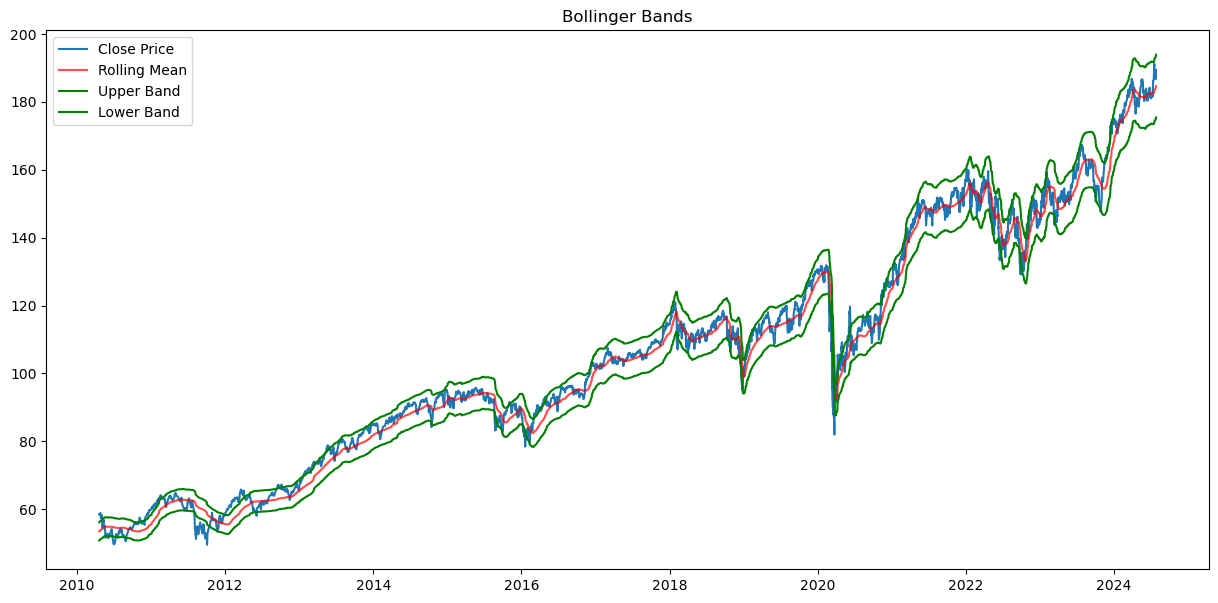

In [137]:

# plot
plt.figure(figsize=(15, 7))
x_axis = bar.bollingers['time_close']
plt.plot(x_axis, bar.bollingers['close'], label='Close Price')
plt.plot(x_axis, bar.bollingers['rolling_mean'], label='Rolling Mean', color='red', alpha=0.7)
plt.plot(x_axis, bar.bollingers['upper_band'], label='Upper Band', color='green')
plt.plot(x_axis, bar.bollingers['lower_band'], label='Lower Band', color='green')
plt.title('Bollinger Bands')
plt.legend()
    

In [138]:
def count_bollinger_Crossed(df: pd.DataFrame):
    """
    Count how many times prices cross the bands out
    df must contain price, bloinger bands columns
    
    returns df with added column 'crossed' which is 1 if price crossed the bands out
    0 otherwise
    """
    df = df.copy()
    df_lag = df.shift(1)
    # case 1
    case1 = (df['close'] > df['upper_band']) & (df_lag['close'] <= df['upper_band'])
    case2 = (df['close'] < df['lower_band']) & (df_lag['close'] >= df['lower_band'])
    crossed = case1 | case2
    df['Boll-crossed'] = crossed.astype(int)
    return df

# bar_time.bollingers = count_bollinger_Crossed(bar_time.bollingers)
bar.bollingers = count_bollinger_Crossed(bar.bollingers)
bar.bollingers['Boll-crossed'].sum()
    

113

$log(\frac{P_t}{P_{t-1}}) = log(P_t) - logP_{t-1}$

In [139]:
"""(b) Now sample those bars using a CUSUM filter, where \(\{y_t\}\) are 
returns and \(h = 0.05\). How many samples do you get?
"""

# SNIPPET 2.4 THE SYMMETRIC CUSUM FILTER
def getTEvents(gRaw, h):
    tEvents, sPos, sNeg = [], 0, 0
    diff = gRaw.diff()
    for i in diff.index[1:]:
        sPos, sNeg = max(0, sPos + diff.loc[i]), min(0, sNeg + diff.loc[i])
        if sNeg < -h:
            sNeg = 0; tEvents.append(i)
        elif sPos > h:
            sPos = 0; tEvents.append(i)
    # return pd.DatetimeIndex(tEvents)
    return tEvents

yt = bar.df_OLHC['close'].pct_change().dropna()
tEvents = getTEvents(yt, h=0.05)
bar.df_OLHC['cusum'] = 0
bar.df_OLHC['cusum'].loc[tEvents] = 1
bar.df_OLHC['cusum'].sum()


/var/folders/j0/8v9qcjfx15g5ftmsy5n0qrq80000gn/T/ipykernel_46090/3104499041.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bar.df_OLHC['cusum'].loc[tEvents] = 1


102

In [149]:
"""
(c) Compute the rolling standard deviation of the two-sampled series. Which one is least heteroscedastic? What is the reason for these results?
"""

bollingers_samples_idx = bar.bollingers['Boll-crossed']==1
bollingers_samples = bar.bollingers.loc[bollingers_samples_idx]

# variance of rolling standard deviation to determine which one is least heteroscedastic
np.var(bollingers_samples['close'].rolling(window=10).std().dropna())

5.398925662981167

Text(0.5, 1.0, 'Rolling Standard Deviation')

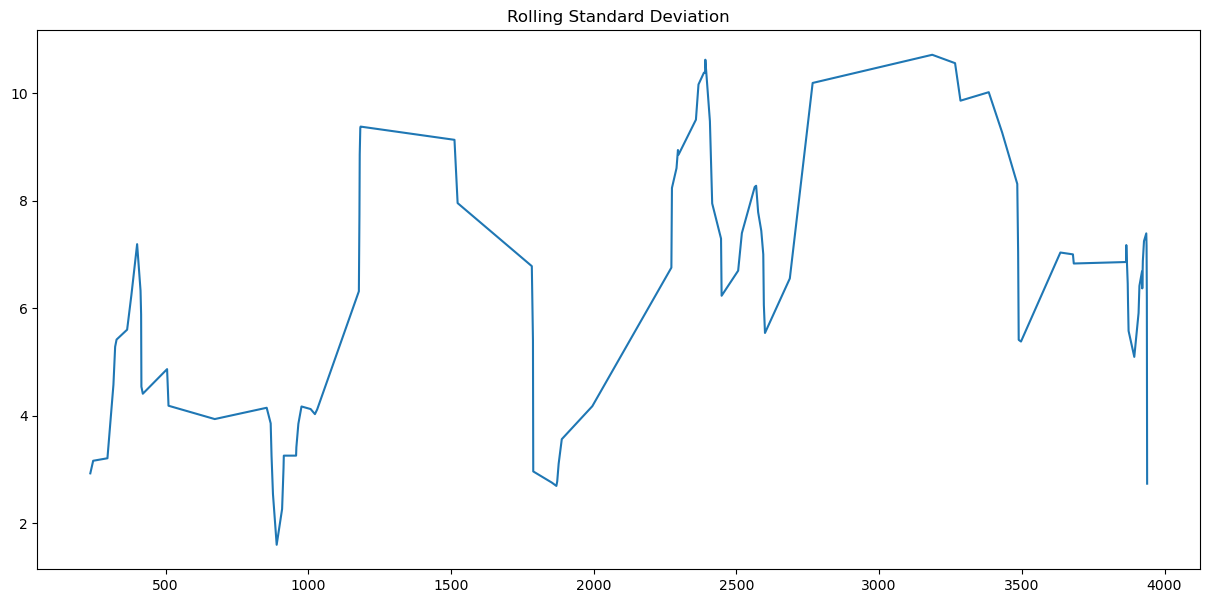

In [150]:
# plot the rolling standard deviation
plt.figure(figsize=(15, 7))
series = bollingers_samples['close'].rolling(window=10).std()
plt.plot(series)
plt.title('Rolling Standard Deviation')

In [151]:
cusum_samples_idx = bar.df_OLHC['cusum']==1
cusum_samples = bar.df_OLHC.loc[cusum_samples_idx]
np.var(cusum_samples['close'].rolling(window=10).std().dropna())

2.968176878388536

### 2.5 Using the bars from exercise 4:

(a) Sample bars using the CUSUM filter, where \(\{y_t\}\) are absolute returns and \(h = 0.05\).

(b) Compute the rolling standard deviation of the sampled bars.

(c) Compare this result with the results from exercise 4. What procedure delivered the least heteroscedastic sample? Why?


In [143]:
"""### 2.5 Using the bars from exercise 4:
(a) Sample bars using the CUSUM filter, where \(\{y_t\}\) are absolute returns and \(h = 0.05\).
(b) Compute the rolling standard deviation of the sampled bars.
(c) Compare this result with the results from exercise 4. What procedure delivered the least heteroscedastic sample? Why?
"""

'### 2.5 Using the bars from exercise 4:\n(a) Sample bars using the CUSUM filter, where \\(\\{y_t\\}\\) are absolute returns and \\(h = 0.05\\).\n(b) Compute the rolling standard deviation of the sampled bars.\n(c) Compare this result with the results from exercise 4. What procedure delivered the least heteroscedastic sample? Why?\n'

In [144]:
"""(a) Sample bars using the CUSUM filter, where \(\{y_t\}\) are absolute returns and \(h = 0.05\).
"""
yt = bar.df_OLHC_imb['close'].pct_change().dropna()
yt = yt.abs()
tEvents = getTEvents(yt, h=0.05)
bar.df_OLHC['cusum'] = 0
bar.df_OLHC['cusum'].loc[tEvents] = 1
bar.df_OLHC['cusum'].sum()

/var/folders/j0/8v9qcjfx15g5ftmsy5n0qrq80000gn/T/ipykernel_46090/3556314456.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bar.df_OLHC['cusum'].loc[tEvents] = 1


50

In [145]:
"""(b) Compute the rolling standard deviation of the sampled bars."""
cusum_samples_idx = bar.df_OLHC['cusum']==1
cusum_samples = bar.df_OLHC.loc[cusum_samples_idx]
np.var(cusum_samples['close'].rolling(window=10).std().dropna())

2.968176878388536

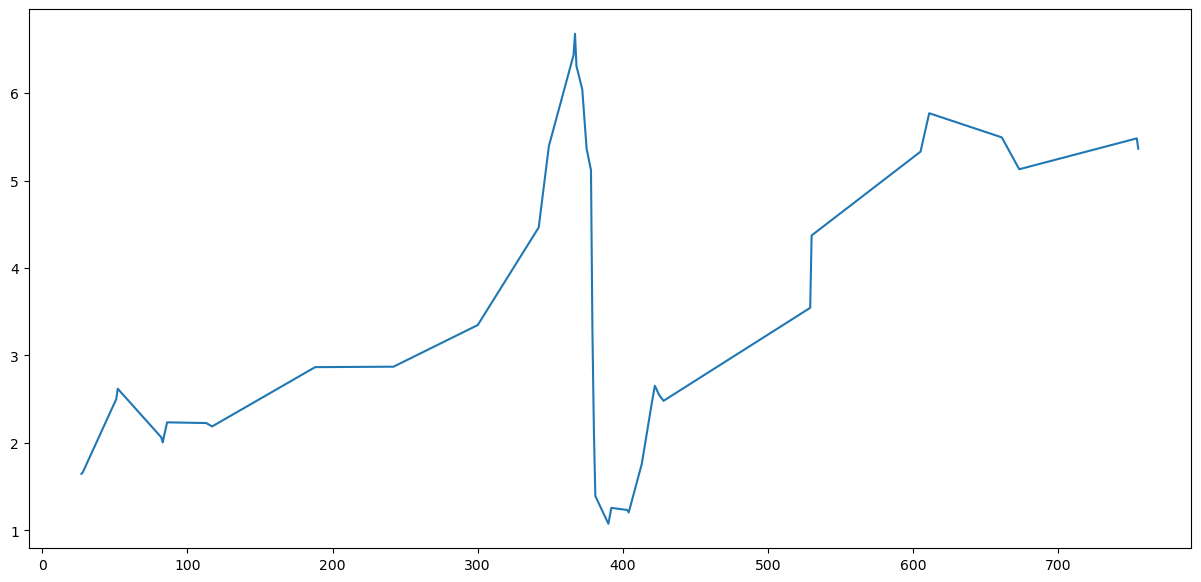

In [146]:
# plot the rolling standard deviation
plt.figure(figsize=(15, 7))
series = cusum_samples['close'].rolling(window=10).std()
plt.plot(series)

In [147]:
# save all variables to a pickle file, to use in another notebook
import pickle

with open('../data/variables_ch2.pkl', 'wb') as f:
    pickle.dump(bars, f)
    pickle.dump(bar_time, f)

In [148]:
bar_time.df

,dates,price,bid,ask,size,v,dv,id,vwap
0,2009-09-28 09:30:00,50.79,50.70,50.79,100,100,5079.00,0,51.369156
1,2009-09-28 09:30:00,50.71,50.70,50.79,638,638,32352.98,0,51.369156
2,2009-09-28 09:31:32,50.75,50.75,50.76,100,100,5075.00,0,51.369156
3,2009-09-28 09:31:33,50.75,50.72,50.75,100,100,5075.00,0,51.369156
4,2009-09-28 09:31:50,50.75,50.73,50.76,300,300,15225.00,0,51.369156
...,...,...,...,...,...,...,...,...,...
2786139,2024-07-26 15:59:46,189.43,189.44,189.46,100,100,18943.00,5415,189.250117
2786140,2024-07-26 15:59:50,189.43,189.41,189.45,150,150,28414.50,5415,189.250117
2786141,2024-07-26 15:59:50,189.42,189.41,189.45,107,107,20267.94,5415,189.250117
2786142,2024-07-26 15:59:52,189.46,189.42,189.46,595,595,112728.70,5415,189.250117
